<a href="https://colab.research.google.com/github/sorelkouyim/LinearRegressionProject/blob/main/Armandine_of_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

We will use the following randomly generated data from sklearn.

In [4]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_classification

In [5]:
#Load the iris dataset from sklearn
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)

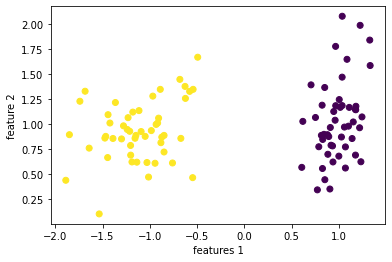

In [6]:
# vizualize the data
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('features 1')
plt.ylabel('feature 2')
plt.show()

In [7]:
def train_test_split(X,y):
  '''
  this function takes as input the sample X and the corresponding features y
  and output the training and test set
  '''
  np.random.seed(0) # To demonstrate that if we use the same seed value twice, we will get the same random number twice
  
  train_size = 0.8
  n = int(len(X)*train_size)
  indices = np.arange(len(X))
  np.random.shuffle(indices)
  train_idx = indices[: n]
  test_idx = indices[n:]
  X_train, y_train = X[train_idx], y[train_idx]
  X_test, y_test = X[test_idx], y[test_idx]

  return X_train, y_train, X_test, y_test

In [8]:
X_train, y_train, X_test, y_test = train_test_split(X,y)
print(f" the training shape is: {X_train.shape}")
print(f" the test shape is: {X_test.shape}")

 the training shape is: (80, 2)
 the test shape is: (20, 2)


## Recaps

1. Logistic/sigmoid function:
\begin{equation}
σ(z)= \dfrac{1}{1+ e^{-z}}
\end{equation}
where  $z= x w$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
σ'(z)= σ(z)(1-σ(z))
\end{equation}
3. Negative log likelihood or Cross-entropy loss:
\begin{equation}
l(w)= -\dfrac{1}{N}\sum_{i= 1}^{N} \left(y^{(i)}_{true} \times \log y^{(i)}_{pred} + (1-y^{(i)}_{true}) \times \log (1-y^{(i)}_{pred}) \right)
\end{equation}

where:

 $y_{pred}= σ(z)$, $z= xw$.

4. Derivative of Cross-entropy loss with respective to $w$:
\begin{equation}
dl(w)= -\dfrac{1}{N}x^T(y_{true} -y_{ped} )
\end{equation}
5. Apply Batch gradient descent to update $w$.



In [9]:
class LogisticRegression:
  '''
  The goal of this class is to create a LogisticRegression class, 
  that we will use as our model to classify data point into a corresponding class
  '''
  
  def __init__(self,lr,n_epochs):
    self.lr = lr
    self.n_epochs = n_epochs
    self.train_losses = []
    self.w = None
    self.weight = []
    self.num_iters=10000
    

  def add_ones(self, x):
    ##### WRITE YOUR CODE HERE #####
    
    ones=np.ones((x.shape[0],1))
    return np.hstack((ones,x))
    
    #### END CODE ####
  def sigmoid(self, x):
    ##### WRITE YOUR CODE HERE ####
    
    return 1/(1+np.exp(-x@self.w))
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    y_pred = self.sigmoid(x)
    loss = -np.mean(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))
    return loss
    #### END CODE ####
  def predict_proba(self,x):  #This function will use the sigmoid function to compute the probalities
    ##### WRITE YOUR CODE HERE #####
    x= self.add_ones(x)
    proba=self.sigmoid(x)
    return proba
    #### END CODE ####
  def predict(self,x):
    ##### WRITE YOUR CODE HERE #####
    probas = self.predict_proba(x)
    print(f"probas: {probas.shape}")
    output =[0 if p<0.5 else 1 for p in probas]
      #convert the probalities into 0 and 1 by using a treshold=0.5
    return output
    #### END CODE ####

  def fit(self,x,y):
    # Add ones to x
    losses=[]
    x= self.add_ones(x)
    # reshape y if needed
    
    y=y.reshape(-1,1)
    # Initialize w to zeros vector >>> (x.shape[1])
    self.w=np.zeros((x.shape[1],1))
  
    for epoch in range(self.n_epochs):
      # make predictions
      ypred = self.sigmoid(x)
      #compute the gradient
      dl = (-1/x.shape[0])*(x.T@(y-ypred))
      #update rule
      self.w=self.w-self.lr*dl

      #Compute and append the training loss in a list
      loss =self.cross_entropy(x,y)
      losses.append(loss)
      if epoch%1000 == 0:
        print(f'loss for epoch {epoch}  : {loss}')
    
  def accuracy(self,y_true, y_pred):
    ##### WRITE YOUR CODE HERE #####
    acc = np.mean(y_true==y_pred)*100
    return acc
    #### END CODE ####

In [10]:
model = LogisticRegression(0.1,n_epochs=10000)
model.fit(X_train,y_train)

loss for epoch 0  : 0.6651814259248028
loss for epoch 1000  : 0.013606979736696483
loss for epoch 2000  : 0.007196027674348288
loss for epoch 3000  : 0.004954009160615557
loss for epoch 4000  : 0.0037999653814976505
loss for epoch 5000  : 0.003092824493889748
loss for epoch 6000  : 0.0026135524484033335
loss for epoch 7000  : 0.0022665351231144076
loss for epoch 8000  : 0.002003254517827552
loss for epoch 9000  : 0.001796420840038774


In [11]:
X_train.shape

(80, 2)

In [12]:
ypred_train = model.predict(X_train)
acc = model.accuracy(y_train,ypred_train)
print(f"The training accuracy is: {acc}")
print(" ")
ypred_test = model.predict(X_test)
acc = model.accuracy(y_test,ypred_test)
print(f"The test accuracy is: {acc}")

probas: (80, 1)
The training accuracy is: 100.0
 
probas: (20, 1)
The test accuracy is: 100.0


In [13]:
def plot_decision_boundary(X, w, b,y_train):
    
    # z = w1x1 + w2x2 + w0
    # one can think of the decision boundary as the line x2=mx1+c
    # Solving we find m and c
    x1 = [X[:,0].min(), X[:,0].max()]
    m = -w[1]/w[2]
    c = -b/w[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.scatter(X[:, 0], X[:, 1],c=y_train)
    plt.scatter(X[:, 0], X[:, 1], c=y_train)
    plt.xlim([-2, 3])
    plt.ylim([0, 2.2])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

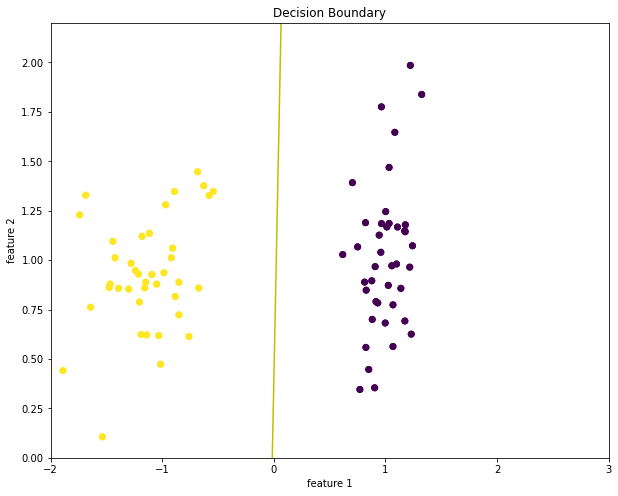

In [14]:
plot_decision_boundary(X_train,model.w,model.w[0],y_train)

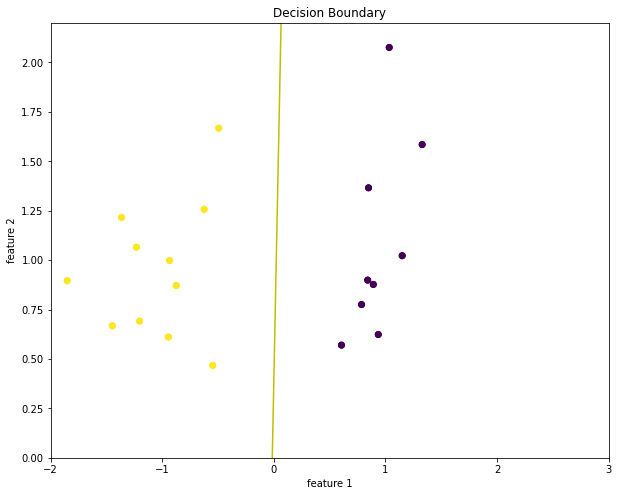

In [15]:
plot_decision_boundary(X_test,model.w,model.w[0],y_test)

## Let’s test out our code for data that is not linearly separable.


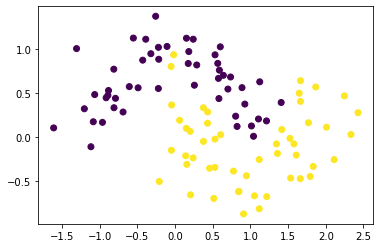

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.24)
plt.scatter(X[:,0],X[:,1], c= y)